### load the clean data

### straight clahe

### build feature vectors

### 1. SIFT keypoints

#### 2. Moravec Corner Detection

#### 3. Thresholding operation (try various thresholds)

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os


### Start with SIFT data and split into train and test set

In [41]:
def determine_disease(filename):
    '''
    Check to see if image is TB or not.
    Input: name of image (last str position is label)
    Output: Boolean value of disease or not
    '''
    if filename[-4] == '1':
        return True
    else:
        return False
    
# TODO: finetune these hyperparameters
def increase_contrast(image, box_size=8, lim = 2):
    '''
    Increase contrast of image
    Input: Image
    Optional: box size and clip limit- can finetune these
    Output: contrast increased image  
    '''
    clahe = cv2.createCLAHE(clipLimit=lim, tileGridSize=(box_size, box_size))
    return clahe.apply(image)

def sift_kp_des(image):
    ''' 
    find sift keypoints and detection on an image
    Input: Image
    Output: sift kp and descriptors
    '''
    sift = cv2.SIFT_create()
    return sift.detectAndCompute(image,None)

# TODO: finetune these hyperparameters
def harris_detection(image, blocksize = 2, ksize = 3, k = .04):
    ''' 
    get HCD corners from image. Idea is to isolate the hilar trunk
    input: image
    Optional: hyperpatameters for HCD which can be finetuned
    return: np array of detected corners
    '''
    return cv2.cornerHarris(image,blocksize,ksize,k)

# TODO: finetune these hyperparameters
def threshold_image(image, min_val = 127, max_val=255):
    '''
    input: image
    Optional: hyperpatameter pixel values for thresholding 
    return: count of white pixels normalized by image size
    '''
    _, thresh = cv2.threshold(image, min_val, max_val, cv2.THRESH_BINARY)
    white_pixels = np.sum(thresh == max_val)
    total_pixels = image.size
    return white_pixels / total_pixels


CHNCXR_0492_1.png
10 3
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 482,  483,  484, ..., 3322, 3323, 3324]))
23360


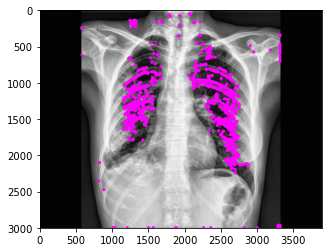

10 5
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 481,  482,  483, ..., 3323, 3324, 3325]))
23360


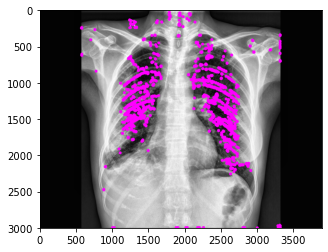

10 11
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 478,  479,  480, ..., 3413, 3414, 3415]))
23360


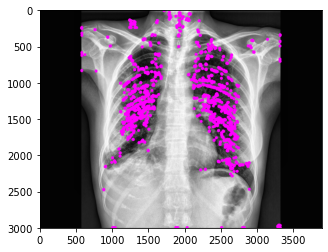

10 15
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 476,  477,  478, ..., 3889, 3890, 3891]))
23360


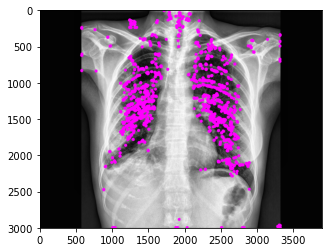

10 21
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 473,  474,  475, ..., 3889, 3890, 3891]))
23360


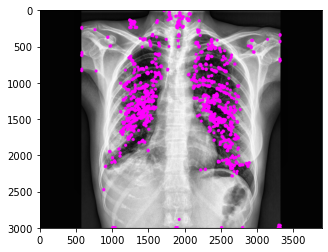

15 3
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 479,  480,  481, ..., 3324, 3325, 3326]))
23360


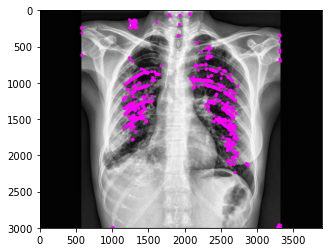

15 5
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 478,  479,  480, ..., 3889, 3890, 3891]))
23360


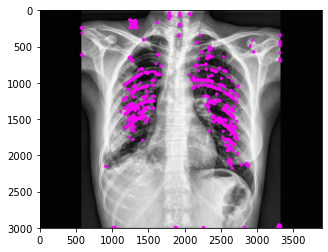

15 11
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 475,  476,  477, ..., 3889, 3890, 3891]))
23360


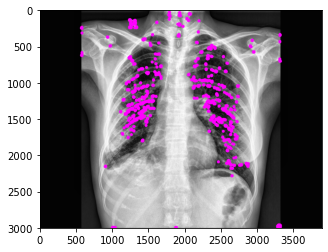

15 15
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 473,  474,  475, ..., 3889, 3890, 3891]))
23360


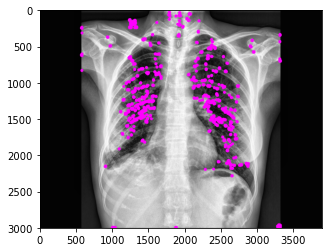

15 21
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 470,  471,  472, ..., 3889, 3890, 3891]))
23360


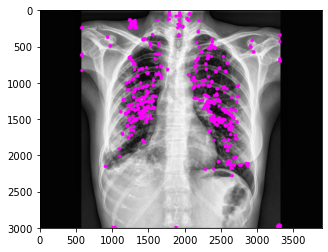

20 3
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 477,  478,  479, ..., 3327, 3328, 3329]))
23360


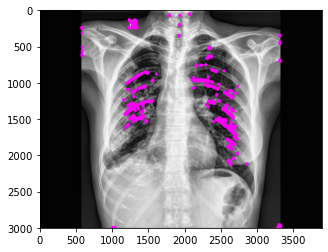

20 5
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 476,  477,  478, ..., 3889, 3890, 3891]))
23360


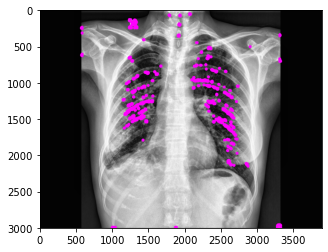

20 11
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 473,  474,  475, ..., 3889, 3890, 3891]))
23360


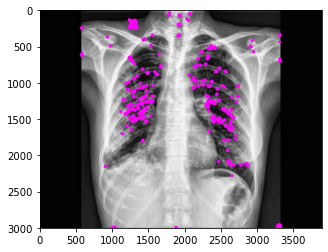

20 15
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 471,  472,  473, ..., 3889, 3890, 3891]))
23360


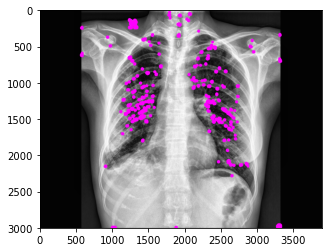

20 21
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 468,  469,  470, ..., 3889, 3890, 3891]))
23360


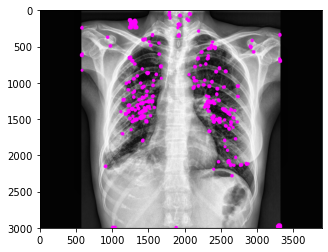

30 3
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 472,  473,  474, ..., 3889, 3890, 3891]))
23360


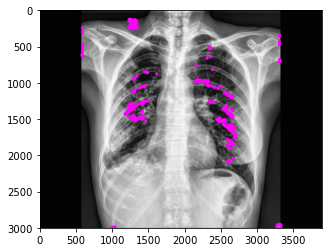

30 5
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 471,  472,  473, ..., 3889, 3890, 3891]))
23360


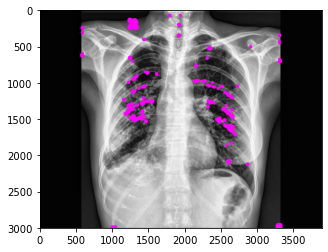

30 11
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 468,  469,  470, ..., 3889, 3890, 3891]))
23360


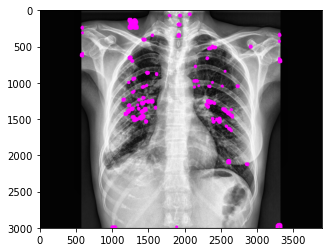

30 15
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 466,  467,  468, ..., 3889, 3890, 3891]))
23360


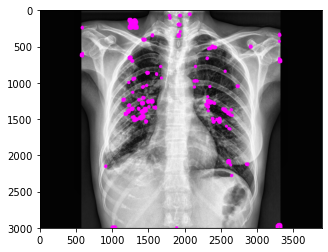

30 21
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 463,  464,  465, ..., 3889, 3890, 3891]))
23360


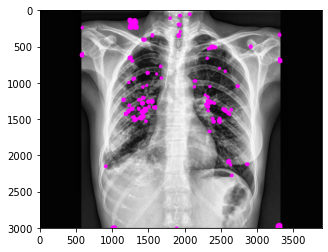

50 3
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 462,  463,  464, ..., 3342, 3343, 3344]))
23360


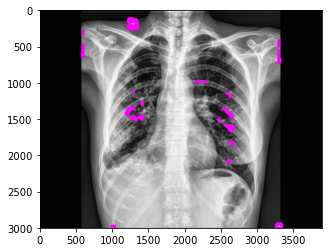

50 5
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 461,  462,  463, ..., 3889, 3890, 3891]))
23360


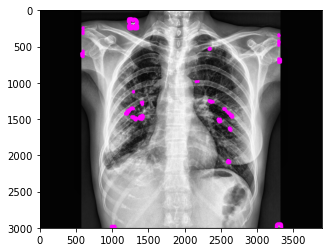

50 11
(array([   0,    0,    0, ..., 3000, 3000, 3000]), array([ 458,  459,  460, ..., 3889, 3890, 3891]))
23360


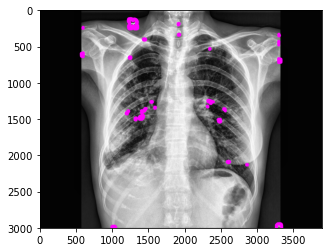

50 15


KeyboardInterrupt: 

In [43]:
path = '/Users/georgienahass/Desktop/fall_classes_PhD/CS415/cs415_final/clean_images'


data_dict = {'0': {'sift': [], 'hcd': [], 'wp' : [] }, 
             '1': {'sift': [], 'hcd': [], 'wp' : []} }

i=0
while i < 20:
    for root, dirs, files in os.walk(path):
        for file in files:
            print(file)
            if file.endswith('.png'):
                image = cv2.imread(os.path.join(root, file), cv2.IMREAD_GRAYSCALE)
            
                # apply contrast to images
                cont_image = increase_contrast(image)
                
                # detect Sift keypoints
                kp, des = sift_kp_des(cont_image)
                
                #HCD
                harris = harris_detection(cont_image, blocksize=20, ksize=11)
                corners = np.argwhere((harris > np.percentile(harris, 99.7)) & (harris < np.percentile(harris, 99.9)))

                

                # HCD tuning
                # blocks = [10, 15,20,30, 50]
                # ks = [3,5,11,15,21]
                # for bs in blocks:
                #     for k_size in ks:            
                #         print(bs, k_size)
                #         harris = harris_detection(cont_image, blocksize=bs, ksize=k_size )
                #         print(harris.nonzero())
                #         # plot hcd on color image
                #         rgb_img = cv2.cvtColor(cont_image,cv2.COLOR_GRAY2BGR)
                #         # rgb_img[harris > 0.01 * harris.max()] = [0,0,255]
                #         lower_percentile = np.percentile(harris, 99.7)   # Change 1 to your desired lower percentile
                #         upper_percentile = np.percentile(harris, 99.9)  # Change 20 to your desired upper percentile

                #         # Find coordinates of strong corners
                #         corners = np.argwhere((harris > np.percentile(harris, 99.7)) & (harris < np.percentile(harris, 99.9)))
                    
                #         print(len(corners))
                #         for y, x in corners:
                #             cv2.circle(rgb_img, (x, y), 20, (255, 0, 255), -1)

                #         plt.imshow(rgb_img)
                #         plt.show()
                        
                # print(harris)

             

                i+=1
